# Определение возраста покупателей

## Исследовательский анализ данных

In [8]:
# < Перенесите сюда исследовательский анализ данных >
import os
import pandas as pd
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt

In [4]:
labels = pd.read_csv('/datasets/faces/labels.csv')
datagen = ImageDataGenerator(rescale=1./255)
image_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


<AxesSubplot:>

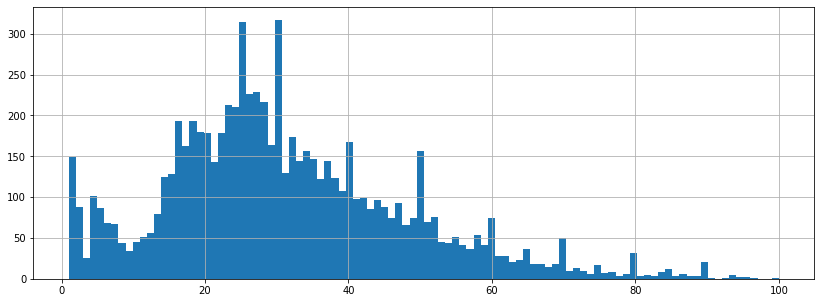

In [6]:
labels.real_age.hist(bins=100, figsize=(14, 5))

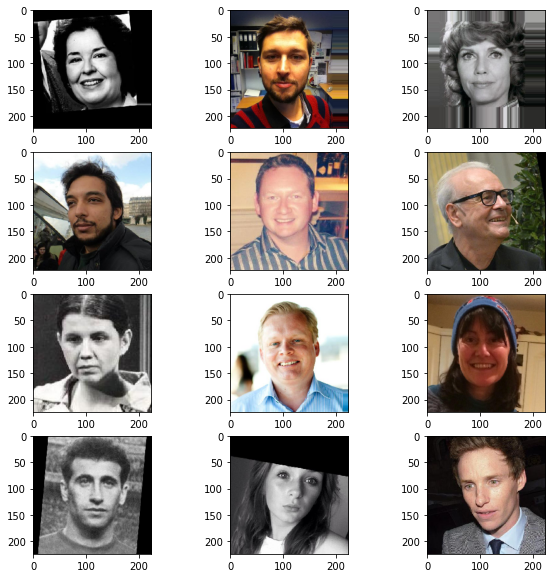

In [10]:
img_batch = next(image_gen_flow)

_, axes_table = plt.subplots(ncols=3, nrows=4, figsize=(10, 10))

img_count = 0

for row in axes_table:
    for ax in row:
        ax.imshow(img_batch[0][img_count])
        img_count += 1

Исследовательский анализ данных свидетельствует,что в выборка состоит из 7591 изображений. Есть как цветные, так и чернобелые изображения. Возраст основной части людей из выборки составляет от 16 до 60 лет.

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

# < скопируйте код сюда >
import os
import pandas as pd
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50

def load_train(path):
    df_labels = pd.read_csv(os.path.join(path, 'labels.csv'))
    train_datagen = ImageDataGenerator(rescale=1./255,  
                                       validation_split=0.25,
                                       vertical_flip=True,
                                       horizontal_flip=True)
    train_data = train_datagen.flow_from_dataframe(
        df_labels,
        x_col='file_name', 
        y_col='real_age',
        directory=os.path.join(path, 'final_files/'), 
        target_size=(224, 224), 
        batch_size=16,  
        class_mode='raw', 
        subset='training', 
        seed=2023)
    return train_data

def load_test(path):
    df_labels = pd.read_csv(os.path.join(path, 'labels.csv'))
    test_datagen = ImageDataGenerator(rescale=1./255,  validation_split=0.25)
    test_data = test_datagen.flow_from_dataframe(
        df_labels,
        x_col='file_name', 
        y_col='real_age',
        directory=os.path.join(path, 'final_files/'), 
        target_size=(224, 224), 
        batch_size=16,  
        class_mode='raw', 
        subset='validation',
        seed=2023)
    return test_data

def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet', 
                        include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', 
                  metrics=['mean_absolute_error'])
    return model

def train_model(model, train_data, test_data, batch_size=None, epochs=5,
                steps_per_epoch=None, validation_steps=None):

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)

    return model



```

```

# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >

Using TensorFlow backend.

Found 5694 validated image filenames.

Found 1897 validated image filenames.


    8192/94765736 [..............................] - ETA: 41s
   90112/94765736 [..............................] - ETA: 58s
  270336/94765736 [..............................] - ETA: 39s
  802816/94765736 [..............................] - ETA: 19s
 2129920/94765736 [..............................] - ETA: 9s 
 4382720/94765736 [>.............................] - ETA: 5s
 8806400/94765736 [=>............................] - ETA: 3s
13164544/94765736 [===>..........................] - ETA: 2s
16506880/94765736 [====>.........................] - ETA: 1s
21053440/94765736 [=====>........................] - ETA: 1s
25444352/94765736 [=======>......................] - ETA: 1s
28852224/94765736 [========>.....................] - ETA: 1s
33267712/94765736 [=========>....................] - ETA: 1s
37707776/94765736 [==========>...................] - ETA: 1s
41172992/94765736 [============>.................] - ETA: 0s
45416448/94765736 [=============>................] - ETA: 0s
50044928/94765736 [==============>...............] - ETA: 0s
53518336/94765736 [===============>..............] - ETA: 0s
57622528/94765736 [=================>............] - ETA: 0s
62087168/94765736 [==================>...........] - ETA: 0s
65839104/94765736 [===================>..........] - ETA: 0s
69877760/94765736 [=====================>........] - ETA: 0s
74260480/94765736 [======================>.......] - ETA: 0s
78102528/94765736 [=======================>......] - ETA: 0s
82149376/94765736 [=========================>....] - ETA: 0s
86646784/94765736 [==========================>...] - ETA: 0s
90431488/94765736 [===========================>..] - ETA: 0s
94412800/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 1s 0us/step


Train for 356 steps, validate for 119 steps

Epoch 1/5


356/356 - 47s - loss: 228.2594 - mean_absolute_error: 11.2543 - val_loss: 738.9256 - val_mean_absolute_error: 22.1863

Epoch 2/5

356/356 - 39s - loss: 118.3958 - mean_absolute_error: 8.2968 - val_loss: 260.5571 - val_mean_absolute_error: 11.9164

Epoch 3/5

356/356 - 38s - loss: 95.2110 - mean_absolute_error: 7.4245 - val_loss: 91.8654 - val_mean_absolute_error: 7.3796

Epoch 4/5

356/356 - 38s - loss: 74.2376 - mean_absolute_error: 6.5819 - val_loss: 97.6549 - val_mean_absolute_error: 7.6388

Epoch 5/5

356/356 - 38s - loss: 62.0628 - mean_absolute_error: 6.0290 - val_loss: 94.3400 - val_mean_absolute_error: 7.2390


119/119 - 9s - loss: 94.3400 - mean_absolute_error: 7.2390

Test MAE: 7.2390


```

## Анализ обученной модели

Созданая модель на базе  ResNet50 без заморозки с полностью связанный слойем GlobalAveragePooling2D
и выходным слоем Dense 1, с функцией активации  нейросети  ReLu, при обучающей и валидационной выборке в 5694/1897 изображений соответственно позволяет достичь значения метрики  MAE = 7.239, что полностью укладывается в требование задания MAE<8.
